## Context
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

## Attribute Information
#### Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

#### Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


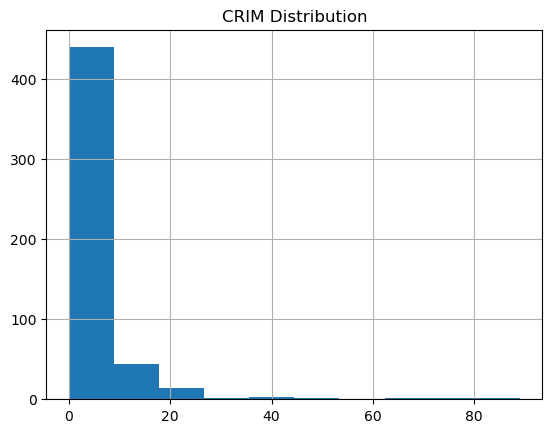

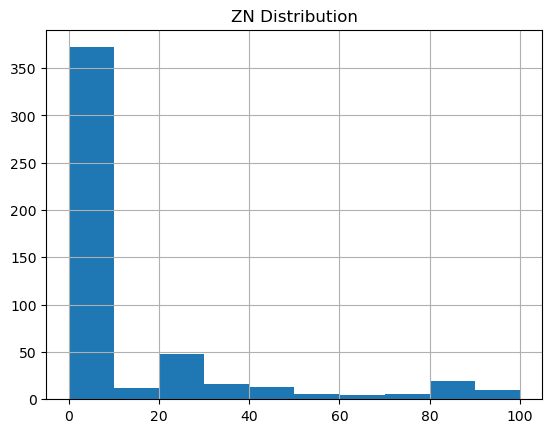

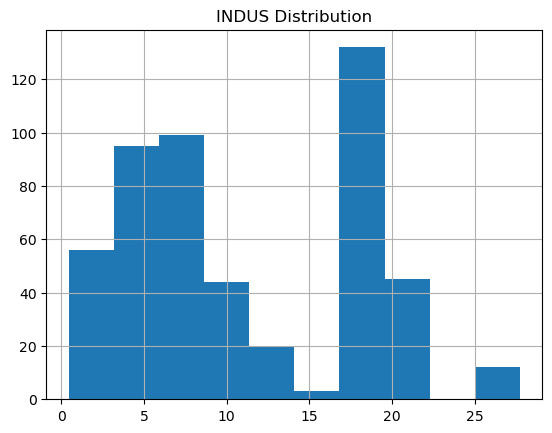

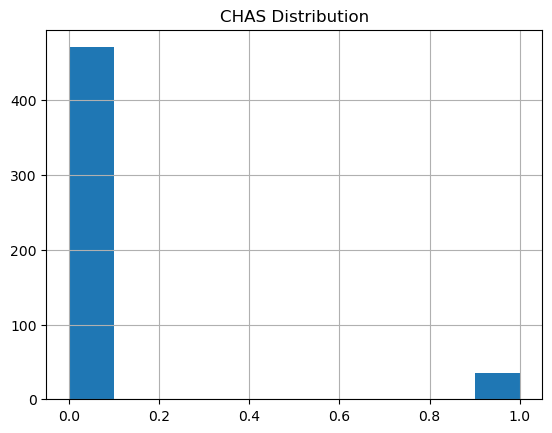

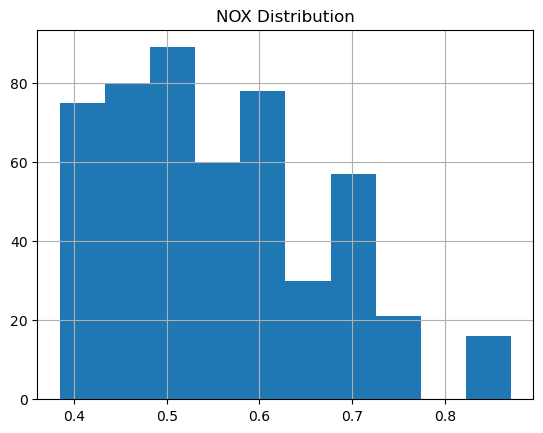

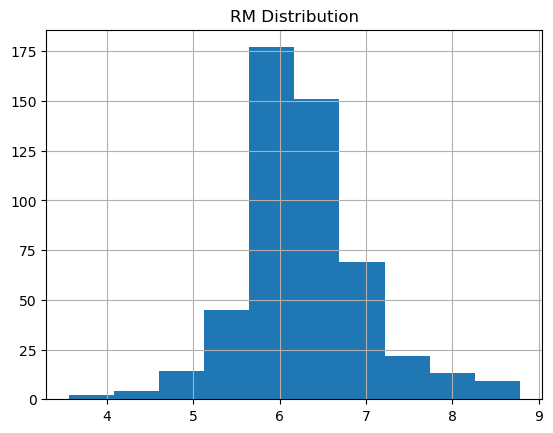

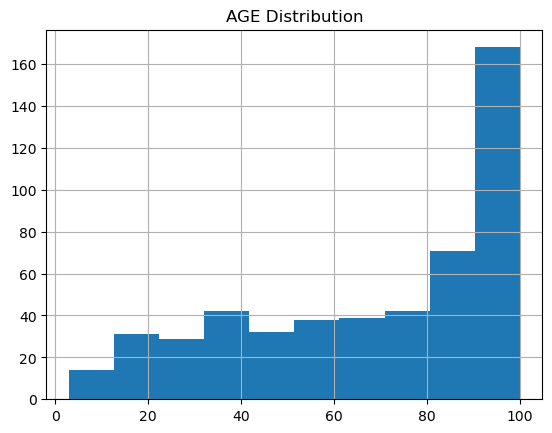

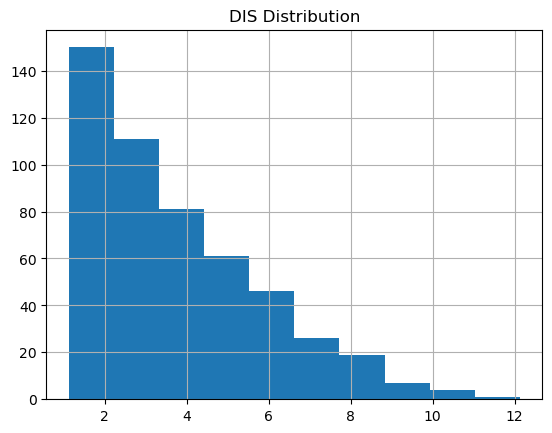

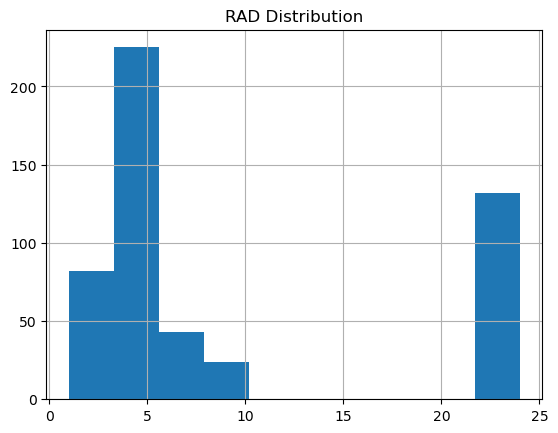

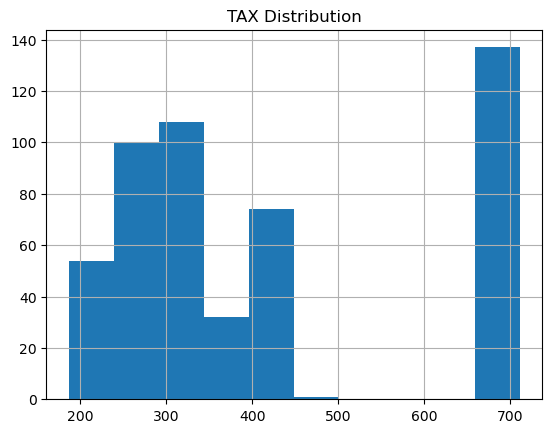

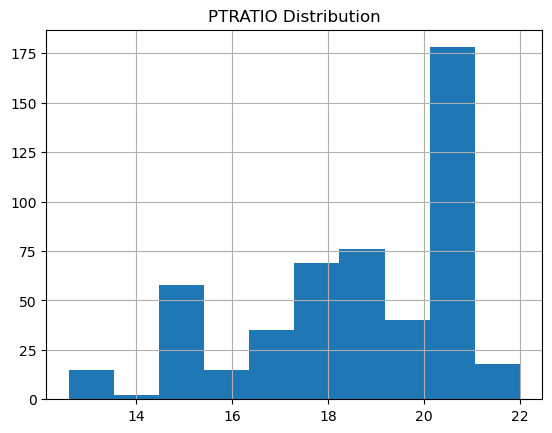

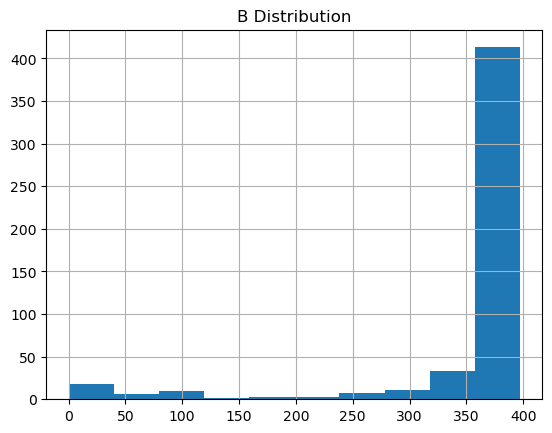

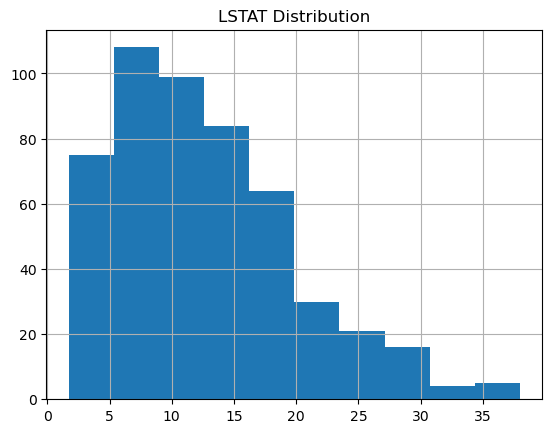

In [9]:
for col in df.columns[:-1]:

    df[col].hist(grid=True)
    plt.title(f"{col} Distribution")
    plt.show()

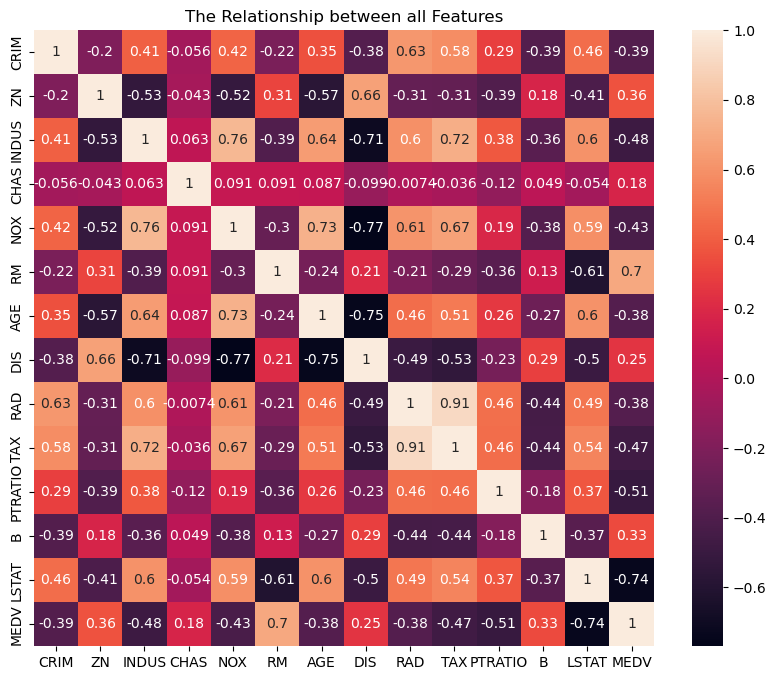

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.title("The Relationship between all Features")
plt.show()

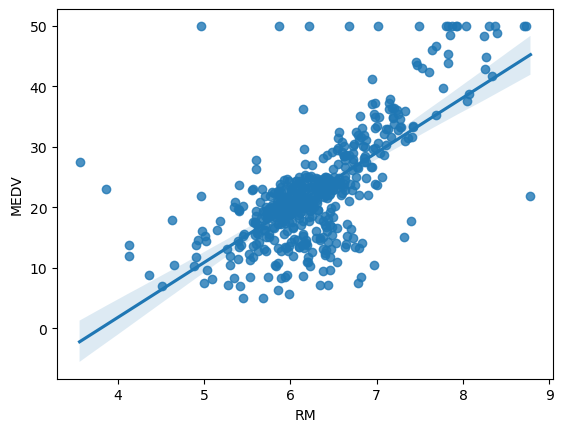

In [11]:
# regression plot betwenn RM and MEDV
sns.regplot(x="RM", y="MEDV", data=df)
plt.show()

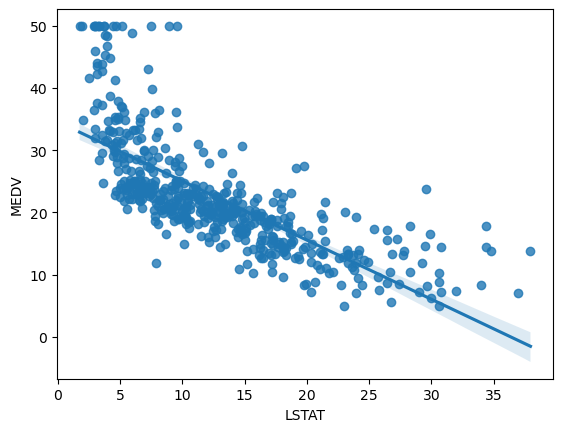

In [12]:
# regression plot betwenn RM and MEDV
sns.regplot(x="LSTAT", y="MEDV", data=df)
plt.show()

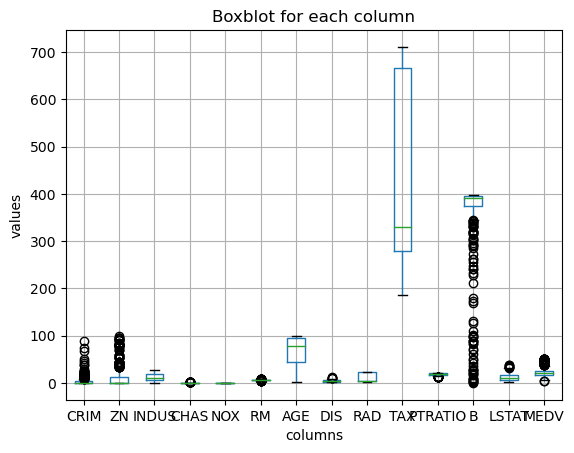

In [13]:
df.boxplot()
plt.title(f"Boxblot for each column")
plt.xlabel('columns')
plt.ylabel('values')

plt.show()


In [14]:
X = df.drop('MEDV',axis='columns')
y = df.MEDV

In [15]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [17]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
#normalize data
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#X = pd.DataFrame(X,columns=)
#X

In [20]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [21]:
def scaling_train_val(X_train, X_val):
    # define the scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    # scale the validation data by the x_train_transformer
    X_val_scaled = scaler.transform(X_val)

    return X_train_scaled, X_val_scaled

In [22]:
X_train, X_test = scaling_train_val(X_train, X_test)

# Linear Regressiion

In [23]:
lrm = LinearRegression()

In [24]:
lrm.fit(X_train, y_train)

LinearRegression()

In [25]:
lrm.score(X_test, y_test)

0.6941157369155497

In [26]:
# Predict the input data
pred_train = lrm.predict(X_train)
# Predict the val data
y_pred = lrm.predict(X_test)

# let's check some metrics

print(
    f"The mean squared error on the trainig data is :{mean_squared_error(y_train, pred_train)}"
)
print(
    f"The mean squared error on the validation data is :{mean_squared_error(y_test, y_pred)}"
)
print("--" * 20)

# let's check the score

print(f"The score on the training data: {r2_score(y_train, pred_train)}")
print(f"The score on the validation data: {r2_score(y_test, y_pred)}")

The mean squared error on the trainig data is :22.00628940597522
The mean squared error on the validation data is :22.889699511231687
----------------------------------------
The score on the training data: 0.751095835624182
The score on the validation data: 0.6941157369155497


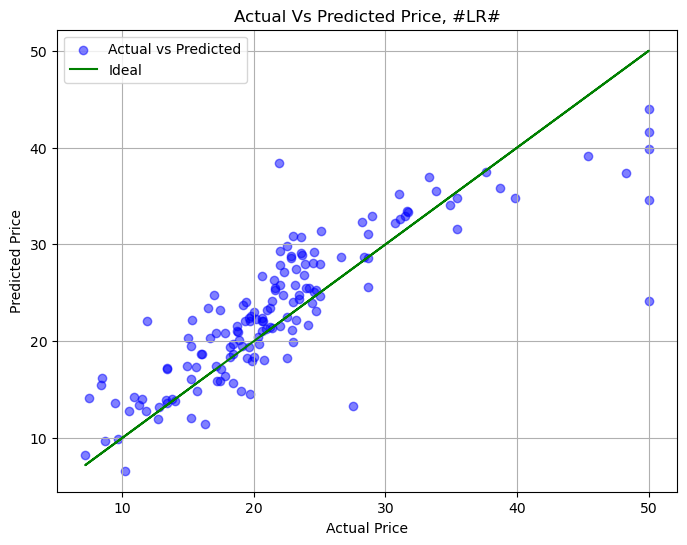

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Actual vs Predicted")
plt.plot(y_test, y_test, color='green', label='Ideal' )
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Vs Predicted Price, #LR#")
plt.legend()
plt.grid(True)
plt. show()

In [28]:
input_data = X_train[3].reshape((1, -1))
pred = lrm.predict(input_data)
target_data = y_train[3].reshape((1, -1))
print('predicted','               ','Actual')
print(pred[0],'        ',target_data[0][0])

predicted                 Actual
19.783602756927753          33.4


In [29]:
from sklearn.linear_model import BayesianRidge

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

# Decision Tree

In [30]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
dt.score(X_test, y_test)

0.7521642751291553

In [32]:
# Predict the input data
pred_train = dt.predict(X_train)
# Predict the val data
y_pred = dt.predict(X_test)

# let's check some metrics

print(
    f"The mean squared error on the trainig data is :{mean_squared_error(y_train, pred_train)}"
)
print(
    f"The mean squared error on the validation data is :{mean_squared_error(y_test, y_pred)}"
)
print("--" * 20)

# let's check the score

print(f"The score on the training data: {r2_score(y_train, pred_train)}")
print(f"The score on the validation data: {r2_score(y_test, y_pred)}")

The mean squared error on the trainig data is :0.0
The mean squared error on the validation data is :18.545855263157893
----------------------------------------
The score on the training data: 1.0
The score on the validation data: 0.7521642751291553


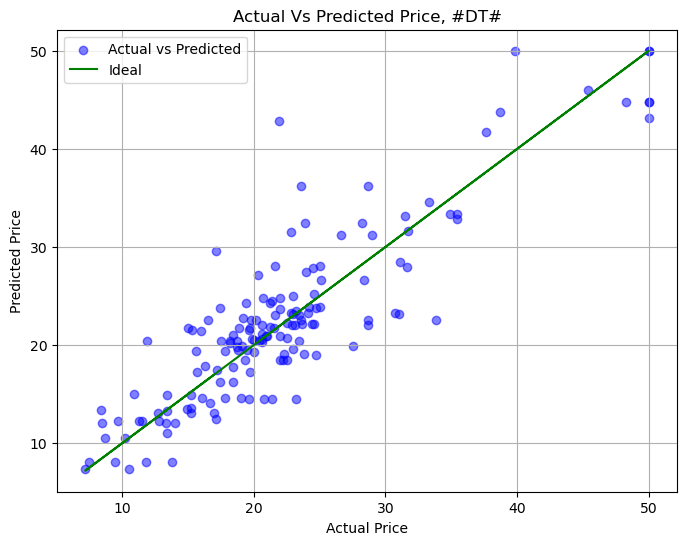

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Actual vs Predicted")
plt.plot(y_test, y_test, color='green', label='Ideal' )
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Vs Predicted Price, #DT#")
plt.legend()
plt.grid(True)
plt. show()

In [34]:
input_data = X_train[3].reshape((1, -1))
pred = dt.predict(input_data)
target_data = y_train[3].reshape((1, -1))
print('predicted','               ','Actual')
print(pred[0],'        ',target_data[0][0])

predicted                 Actual
19.5          33.4


# Random Forest

In [35]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
rf.score(X_test, y_test)

0.8292703484640763

In [37]:
# Predict the input data
pred_train = rf.predict(X_train)
# Predict the val data
y_pred = rf.predict(X_test)

# let's check some metrics

print(
    f"The mean squared error on the trainig data is :{mean_squared_error(y_train, pred_train)}"
)
print(
    f"The mean squared error on the validation data is :{mean_squared_error(y_test, y_pred)}"
)
print("--" * 20)

# let's check the score

print(f"The score on the training data: {r2_score(y_train, pred_train)}")
print(f"The score on the validation data: {r2_score(y_test, y_pred)}")

The mean squared error on the trainig data is :1.4992481242937836
The mean squared error on the validation data is :12.775911980263139
----------------------------------------
The score on the training data: 0.983042615922881
The score on the validation data: 0.8292703484640763


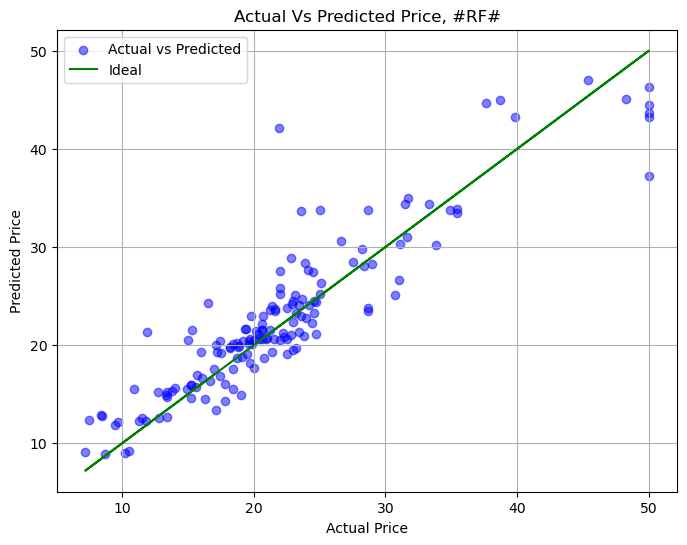

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Actual vs Predicted")
plt.plot(y_test, y_test, color='green', label='Ideal' )
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Vs Predicted Price, #RF#")
plt.legend()
plt.grid(True)
plt. show()

In [39]:
input_data = X_train[3].reshape((1, -1))
pred = rf.predict(input_data)
target_data = y_train[3].reshape((1, -1))
print('predicted','               ','Actual')
print(pred[0],'        ',target_data[0][0])

predicted                 Actual
19.785000000000004          33.4


## Naive Bayes

In [40]:
nb = BayesianRidge()
nb.fit(X_train, y_train)

BayesianRidge()

In [41]:
nb.score(X_test, y_test)

0.6882334896717194

In [42]:
# Predict the input data
pred_train = nb.predict(X_train)
# Predict the val data
y_pred = nb.predict(X_test)

# let's check some metrics

print(
    f"The mean squared error on the trainig data is :{mean_squared_error(y_train, pred_train)}"
)
print(
    f"The mean squared error on the validation data is :{mean_squared_error(y_test, y_pred)}"
)
print("--" * 20)

# let's check the score

print(f"The score on the training data: {r2_score(y_train, pred_train)}")
print(f"The score on the validation data: {r2_score(y_test, y_pred)}")

The mean squared error on the trainig data is :22.060955178690868
The mean squared error on the validation data is :23.3298753820148
----------------------------------------
The score on the training data: 0.7504775333640086
The score on the validation data: 0.6882334896717194


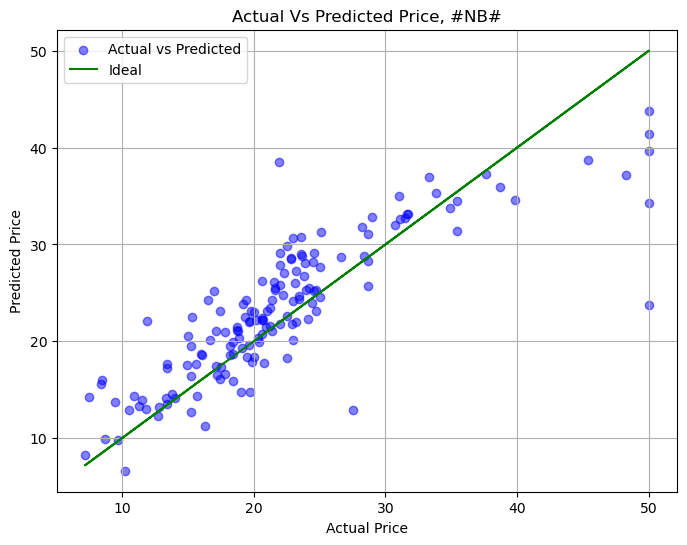

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Actual vs Predicted")
plt.plot(y_test, y_test, color='green', label='Ideal' )
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Vs Predicted Price, #NB#")
plt.legend()
plt.grid(True)
plt. show()

In [44]:
input_data = X_train[3].reshape((1, -1))
pred = nb.predict(input_data)
target_data = y_train[3].reshape((1, -1))
print('predicted','               ','Actual')
print(pred[0],'        ',target_data[0][0])

predicted                 Actual
19.76431747980903          33.4
